# Necessity Graphs 
## Datasets
- [CPI: Food](https://www.ceicdata.com/en/singapore/consumer-price-index-2019100/cpi-food)
- [General CPI](https://data.gov.sg/datasets/d_ba8a05c8908b5e1dc13540286d585f8a/view)

In [279]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
import re

## global variables

In [280]:
BASE_DATA_GOV_URL = "https://data.gov.sg/api/action/datastore_search"

## retrieve data

In [281]:
# function to fetch data from data.gov.sg 
def fetch_datagov_dataset(dataset_id: str, limit: int=10_000_000) -> pd.DataFrame:
    """
    Fetch dataset from data.gov.sg API.

    Args: 
        dataset_id (str): The dataset ID from data.gov.sg.
        limit (int, optional): Number of records to fetch. Defaults to 10 million.

    Returns: 
        pd.DataFrame: Data retrieved in DataFrame format.
    """
    response = requests.get(BASE_DATA_GOV_URL, params={"resource_id": dataset_id, "limit": limit})
    data = response.json()
    
    if not data["success"]:
        raise Error(f"Failed to fetch dataset ({dataset_id}).")
        
    return pd.DataFrame(data["result"]["records"])

In [282]:
# Fetch Consumer Price Index (CPI) dataset from data.gov.sg
datagov_dataset_id = "d_de7e93a1d0e22c790516a632747bf7f0"
cpi_df = fetch_datagov_dataset(datagov_dataset_id)

# Fetch Household Income per pax dataset from data.gov.sg
household_dataset_id = "d_c040090e33c36244606071f21b532af9"
hh_df = fetch_datagov_dataset(household_dataset_id)

## Data Exploration

In [283]:
cpi_df.head()

,_id,DataSeries,2024Dec,2024Nov,2024Oct,2024Sep,2024Aug,2024Jul,2024Jun,2024May,...,1961Oct,1961Sep,1961Aug,1961Jul,1961Jun,1961May,1961Apr,1961Mar,1961Feb,1961Jan
0,1,All Items,117.197,116.792,116.756,117.123,116.829,116.028,116.323,116.574,...,24.463,24.393,24.517,24.276,24.223,24.053,24.187,24.585,24.565,24.542
1,2,Food,119.272,118.981,118.897,118.693,118.553,118.368,118.361,118.332,...,21.614,21.506,21.699,21.323,21.242,20.967,21.172,21.82,21.777,21.762
2,3,Food Excl Food Serving Services,118.209,117.746,117.707,117.649,117.03,116.54,116.641,116.975,...,na,na,na,na,na,na,na,na,na,na
3,4,Bread & Cereals,119.91,119.717,119.428,118.818,118.12,118.209,117.849,117.711,...,na,na,na,na,na,na,na,na,na,na
4,5,Rice,105.233,104.995,104.408,105.534,103.426,104.208,103.349,104.059,...,na,na,na,na,na,na,na,na,na,na


In [284]:
hh_df.head()

,_id,Dollar,ResidentHouseholds_Average,ResidentHouseholds_Median1,ResidentEmployedHouseholds_Average,ResidentEmployedHouseholds_Median1
0,1,2000,1586,1125,1735,1236
1,2,2001,1792,1250,1925,1352
2,3,2002,1713,1189,1883,1320
3,4,2003,1724,1187,1909,1335
4,5,2004,1727,1183,1916,1331


In [285]:
cpi_df.describe()

,_id
count,152.000000
mean,76.500000
std,44.022721
min,1.000000
25%,38.750000
50%,76.500000
75%,114.250000
max,152.000000


In [286]:
hh_df.describe()

,_id
count,24.000000
mean,12.500000
std,7.071068
min,1.000000
25%,6.750000
50%,12.500000
75%,18.250000
max,24.000000


In [287]:
cpi_df.isnull().sum()

_id           0
DataSeries    0
2024Dec       0
2024Nov       0
2024Oct       0
             ..
1961May       0
1961Apr       0
1961Mar       0
1961Feb       0
1961Jan       0
Length: 770, dtype: int64

In [288]:
hh_df.isnull().sum()

_id                                   0
Dollar                                0
ResidentHouseholds_Average            0
ResidentHouseholds_Median1            0
ResidentEmployedHouseholds_Average    0
ResidentEmployedHouseholds_Median1    0
dtype: int64

In [289]:
cpi_df.dtypes

_id            int64
DataSeries    object
2024Dec       object
2024Nov       object
2024Oct       object
               ...  
1961May       object
1961Apr       object
1961Mar       object
1961Feb       object
1961Jan       object
Length: 770, dtype: object

In [290]:
hh_df.dtypes

_id                                    int64
Dollar                                object
ResidentHouseholds_Average            object
ResidentHouseholds_Median1            object
ResidentEmployedHouseholds_Average    object
ResidentEmployedHouseholds_Median1    object
dtype: object

In [291]:
cpi_df["DataSeries"].to_list()

['All Items',
 '    Food',
 '    Food Excl Food Serving Services',
 '        Bread & Cereals',
 '            Rice',
 '            Flour',
 '            Bread',
 '            Noodles & Pasta',
 '            Biscuits & Cookies',
 '            Cakes & Pastries',
 '            Other Cereals',
 '        Meat',
 '            Pork, Chilled',
 '            Beef, Chilled',
 '            Mutton, Chilled',
 '            Poultry, Chilled',
 '            Meat, Frozen',
 '            Meat Preparations',
 '        Fish & Seafood',
 '            Fish, Chilled',
 '            Fish, Frozen',
 '            Other Seafood',
 '            Seafood Preparations',
 '        Milk, Cheese & Eggs',
 '            Formula Milk Powder',
 '            Other Milk & Dairy Products',
 '            Eggs',
 '        Oils & Fats',
 '            Butter & Other Fats',
 '            Cooking Oils',
 '        Fruits',
 '            Tropical Fruits, Fresh',
 '            Citrus, Berries & Other Fruits, Fresh',
 '            Pres

In [292]:
cpi_df[cpi_df["DataSeries"].str.contains("Health Care")]

,_id,DataSeries,2024Dec,2024Nov,2024Oct,2024Sep,2024Aug,2024Jul,2024Jun,2024May,...,1961Oct,1961Sep,1961Aug,1961Jul,1961Jun,1961May,1961Apr,1961Mar,1961Feb,1961Jan
82,83,Health Care,111.006,110.75,110.488,111.95,111.146,110.851,110.36,110.416,...,18.604,18.604,18.604,18.604,18.604,18.604,18.604,18.604,18.604,18.604


## Rows to use 
- Food Excl Food Serving Services
- Transport
- Housing & Utilities
- Telecommunication Services
- Health Care

In [293]:
def format_cpi(cpi_df: pd.DataFrame, row_list: List[str], year_range: int=11) -> pd.DataFrame: 
    cpi_df["DataSeries"] = cpi_df["DataSeries"].str.strip()
    n_df = cpi_df[cpi_df["DataSeries"].isin(row_list)].reset_index(drop=True)
    n_df = n_df.drop(columns=["_id"], errors="ignore")

    current_year = 2023
    y_range = [str(current_year-x) for x in range(year_range)]

    yearly_avg = {}
    row_names = []
    for index, row in n_df.iterrows():
        row_name = row["DataSeries"]
        row_names.append(row_name)

        yearly_avg[row_name] = {}

        for year in y_range:
            month_col = [col for col in n_df.columns if col.startswith(year)]
            if month_col:
                row_data = row[month_col].astype(float)
                yearly_avg[row_name][year] = row_data.sum() / len(month_col)
        
    df = pd.DataFrame(yearly_avg).T
    return df


In [294]:
def format_income(hh_df: pd.DataFrame, col_list: List[str], year_range: int=11) -> pd.DataFrame:
    income_df = hh_df[col_list]
    income_df = income_df.set_index("Dollar").T
    income_df.index = ["Income"]

    year_to_use = [str(2023-x) for x in range(year_range)]
    
    return income_df[year_to_use]

In [295]:
col_list = [
    "Dollar",
    "ResidentEmployedHouseholds_Average"
]
income_df = format_income(hh_df, col_list)
income_df

Dollar,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Income,4699,4478,4166,4022,4115,3969,3835,3688,3624,3418,3204


In [296]:
row_list = [
    "Food Excl Food Serving Services",
    "Transport",
    "Housing & Utilities",
    "Telecommunication Services",
    "Health Care"
]
n_df = format_cpi(cpi_df, row_list)
n_df

,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Food Excl Food Serving Services,115.749917,110.087667,104.545583,102.898333,100.000000,98.870333,97.607500,96.366083,94.198167,93.058333,90.387583
Housing & Utilities,111.001583,106.406250,101.100083,99.713583,100.000083,101.002583,102.371667,105.033750,109.498500,113.517000,113.387833
Health Care,106.321417,101.746167,99.579250,98.463417,99.999917,98.905250,96.924333,94.566083,93.560417,93.639500,91.116833
Transport,133.752417,125.792667,108.055167,99.270250,100.000000,99.234583,99.755667,97.227667,99.620333,101.072917,102.320167
Telecommunication Services,102.143250,98.914833,100.492833,100.816000,99.999583,100.455083,101.216667,100.572000,101.046333,100.727833,100.998083


In [312]:
n_df = n_df.reset_index().rename(columns={"index": "Category"})

necessity_total = n_df.drop(columns=["Category"]).sum()

necessity_total_df = necessity_total.to_frame(name="Total Necessity Expenditure").T

merged_df = pd.concat([income_df, necessity_total_df])

merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

merged_df = merged_df.reset_index().melt(id_vars="index", var_name="Year", value_name="Amount")

merged_df.rename(columns={"index": "Category"}, inplace=True)

merged_df["Year"] = merged_df["Year"].astype(int)
merged_df["Amount"] = merged_df["Amount"].astype(float)

## Visualisation

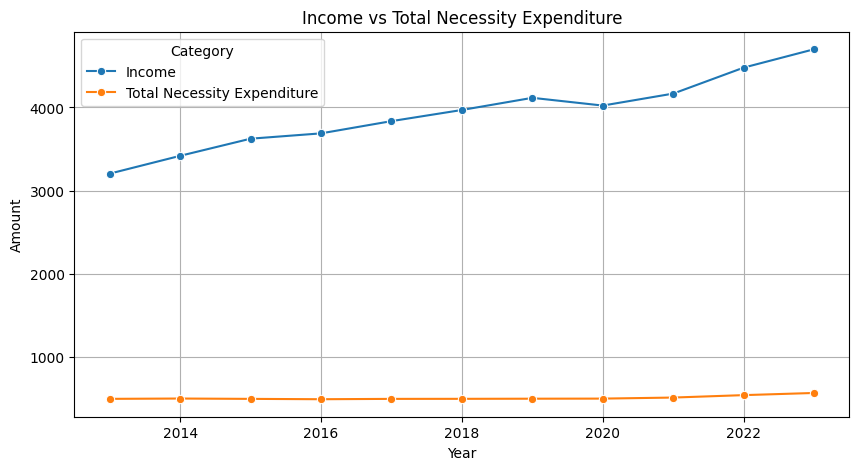

In [310]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x="Year", y="Amount", hue="Category", marker="o")

plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("Income vs Total Necessity Expenditure")
plt.legend(title="Category")
plt.grid(True)

plt.show()